In [196]:
#Getting all necessary libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore')

In [197]:
thera_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
thera_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [198]:
thera_df.shape # Total records as 5000 and 14 columns

(5000, 14)

In [199]:
print(thera_df.isnull().sum())
print(thera_df.isna().sum()) # No missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [200]:
thera_df[thera_df < 0] = 0 # Replacing -ve Experience values with 0

In [201]:
thera_df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22,  0, 34, 38, 40, 33,  4, 42, 43], dtype=int64)

In [202]:
thera_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1. Mean and medians for Income, CCAvg and mortgage shows skewed relationships.
2. Income, CCAvg and Mortgage holds outliers

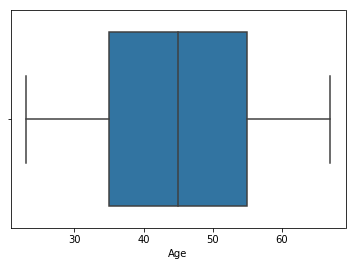

In [203]:
sns.boxplot(x='Age', data=thera_df) # No outliers

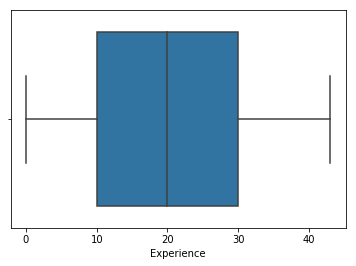

In [204]:
sns.boxplot(x='Experience', data=thera_df) # No outliers

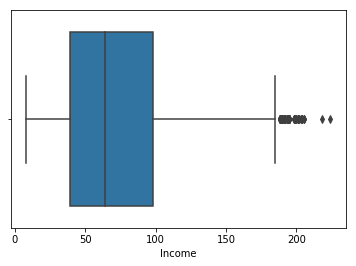

In [205]:
sns.boxplot(x='Income', data=thera_df) # Income has outliers

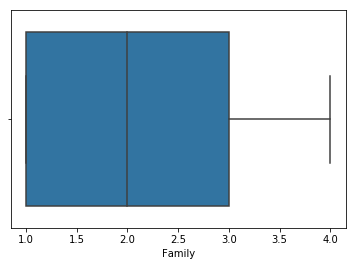

In [206]:
sns.boxplot(x='Family', data=thera_df) # No outliers

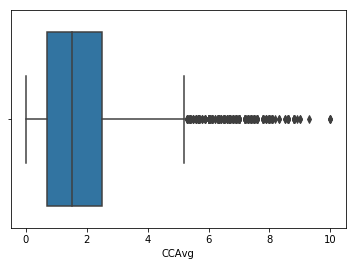

In [207]:
sns.boxplot(x='CCAvg', data=thera_df) # CCAvg shows huge accumulation of outliers

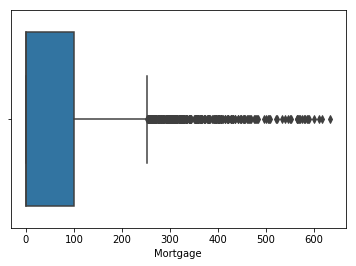

In [208]:
sns.boxplot(x='Mortgage', data=thera_df) # Mortgages shows huge acculation of outliers

In [209]:
#Income, Mortgage, and CCAvg shows huge outliers.

In [210]:
# Droping the ID and ZIP Code feature as they doesn't seems to be contributing to our model in constructive way

thera_df.drop(['ID','ZIP Code'],axis = 1, inplace=True)

In [211]:
#Treating outliers for Incode feature and replacing the outliers with upper wisker

In [212]:
up_whisk= thera_df["Income"].quantile(0.75)+1.5*(thera_df["Income"].quantile(0.75) - thera_df["Income"].quantile(0.25))

for i in thera_df['Income']:
    if(i > up_whisk):
        thera_df['Income']=thera_df['Income'].replace(i,up_whisk)

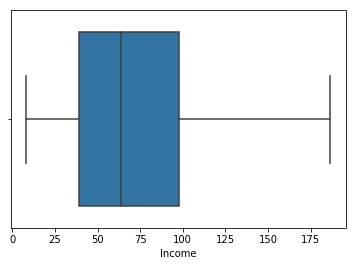

In [213]:
sns.boxplot(x='Income', data=thera_df) # All outliers are capped with upper wisker

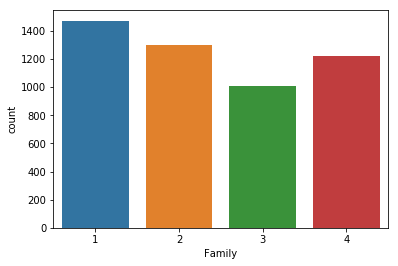

In [214]:
sns.countplot(x = 'Family', data=thera_df) # count of families depending on the count of family members

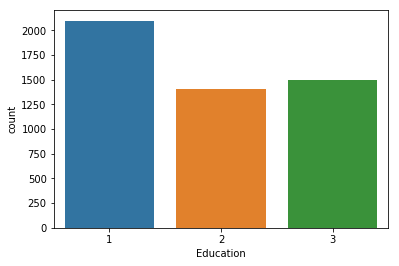

In [215]:
sns.countplot(x = 'Education', data=thera_df) # Most of the population are undergraduate

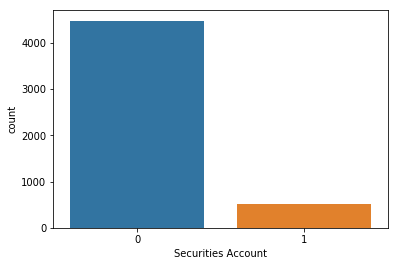

In [216]:
sns.countplot(x = thera_df['Securities Account'])  # More number of people do not have securities account at the bank

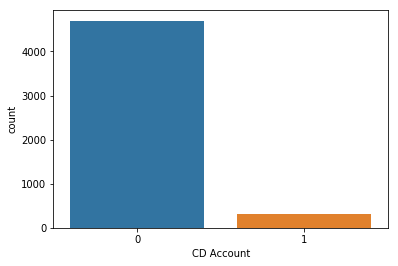

In [217]:
sns.countplot(x = thera_df['CD Account']) # Majority dont have CD account

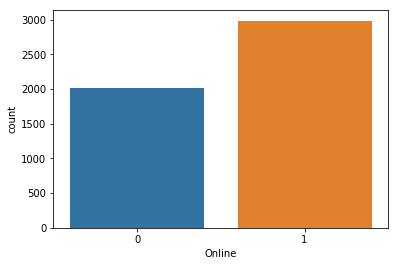

In [218]:
sns.countplot(x = thera_df['Online'])  # Majority use online transaction over offline transactions

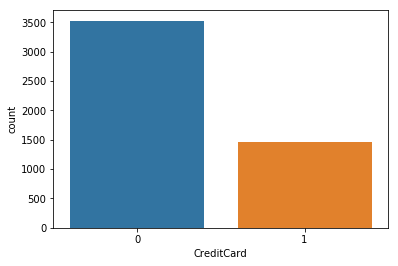

In [219]:
sns.countplot(x = thera_df['CreditCard']) # Very few of the population uses CC with the bank

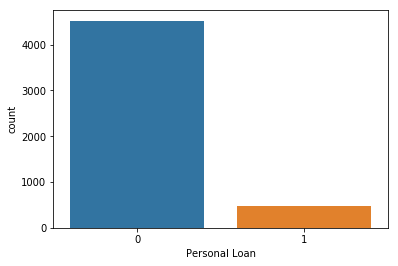

In [220]:
sns.countplot(x = thera_df['Personal Loan'])  # very few people have taken up the personal loan with the bank

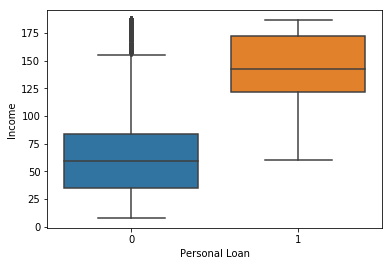

In [221]:
sns.boxplot(y='Income',x='Personal Loan',data = thera_df)

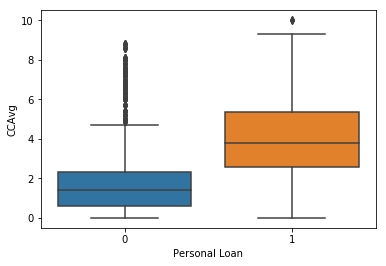

In [222]:
sns.boxplot(y='CCAvg',x='Personal Loan',data = thera_df)

Income and CCAvg shows strong relation with personal loan. People with high Income and CCAvg tend to take the loan.

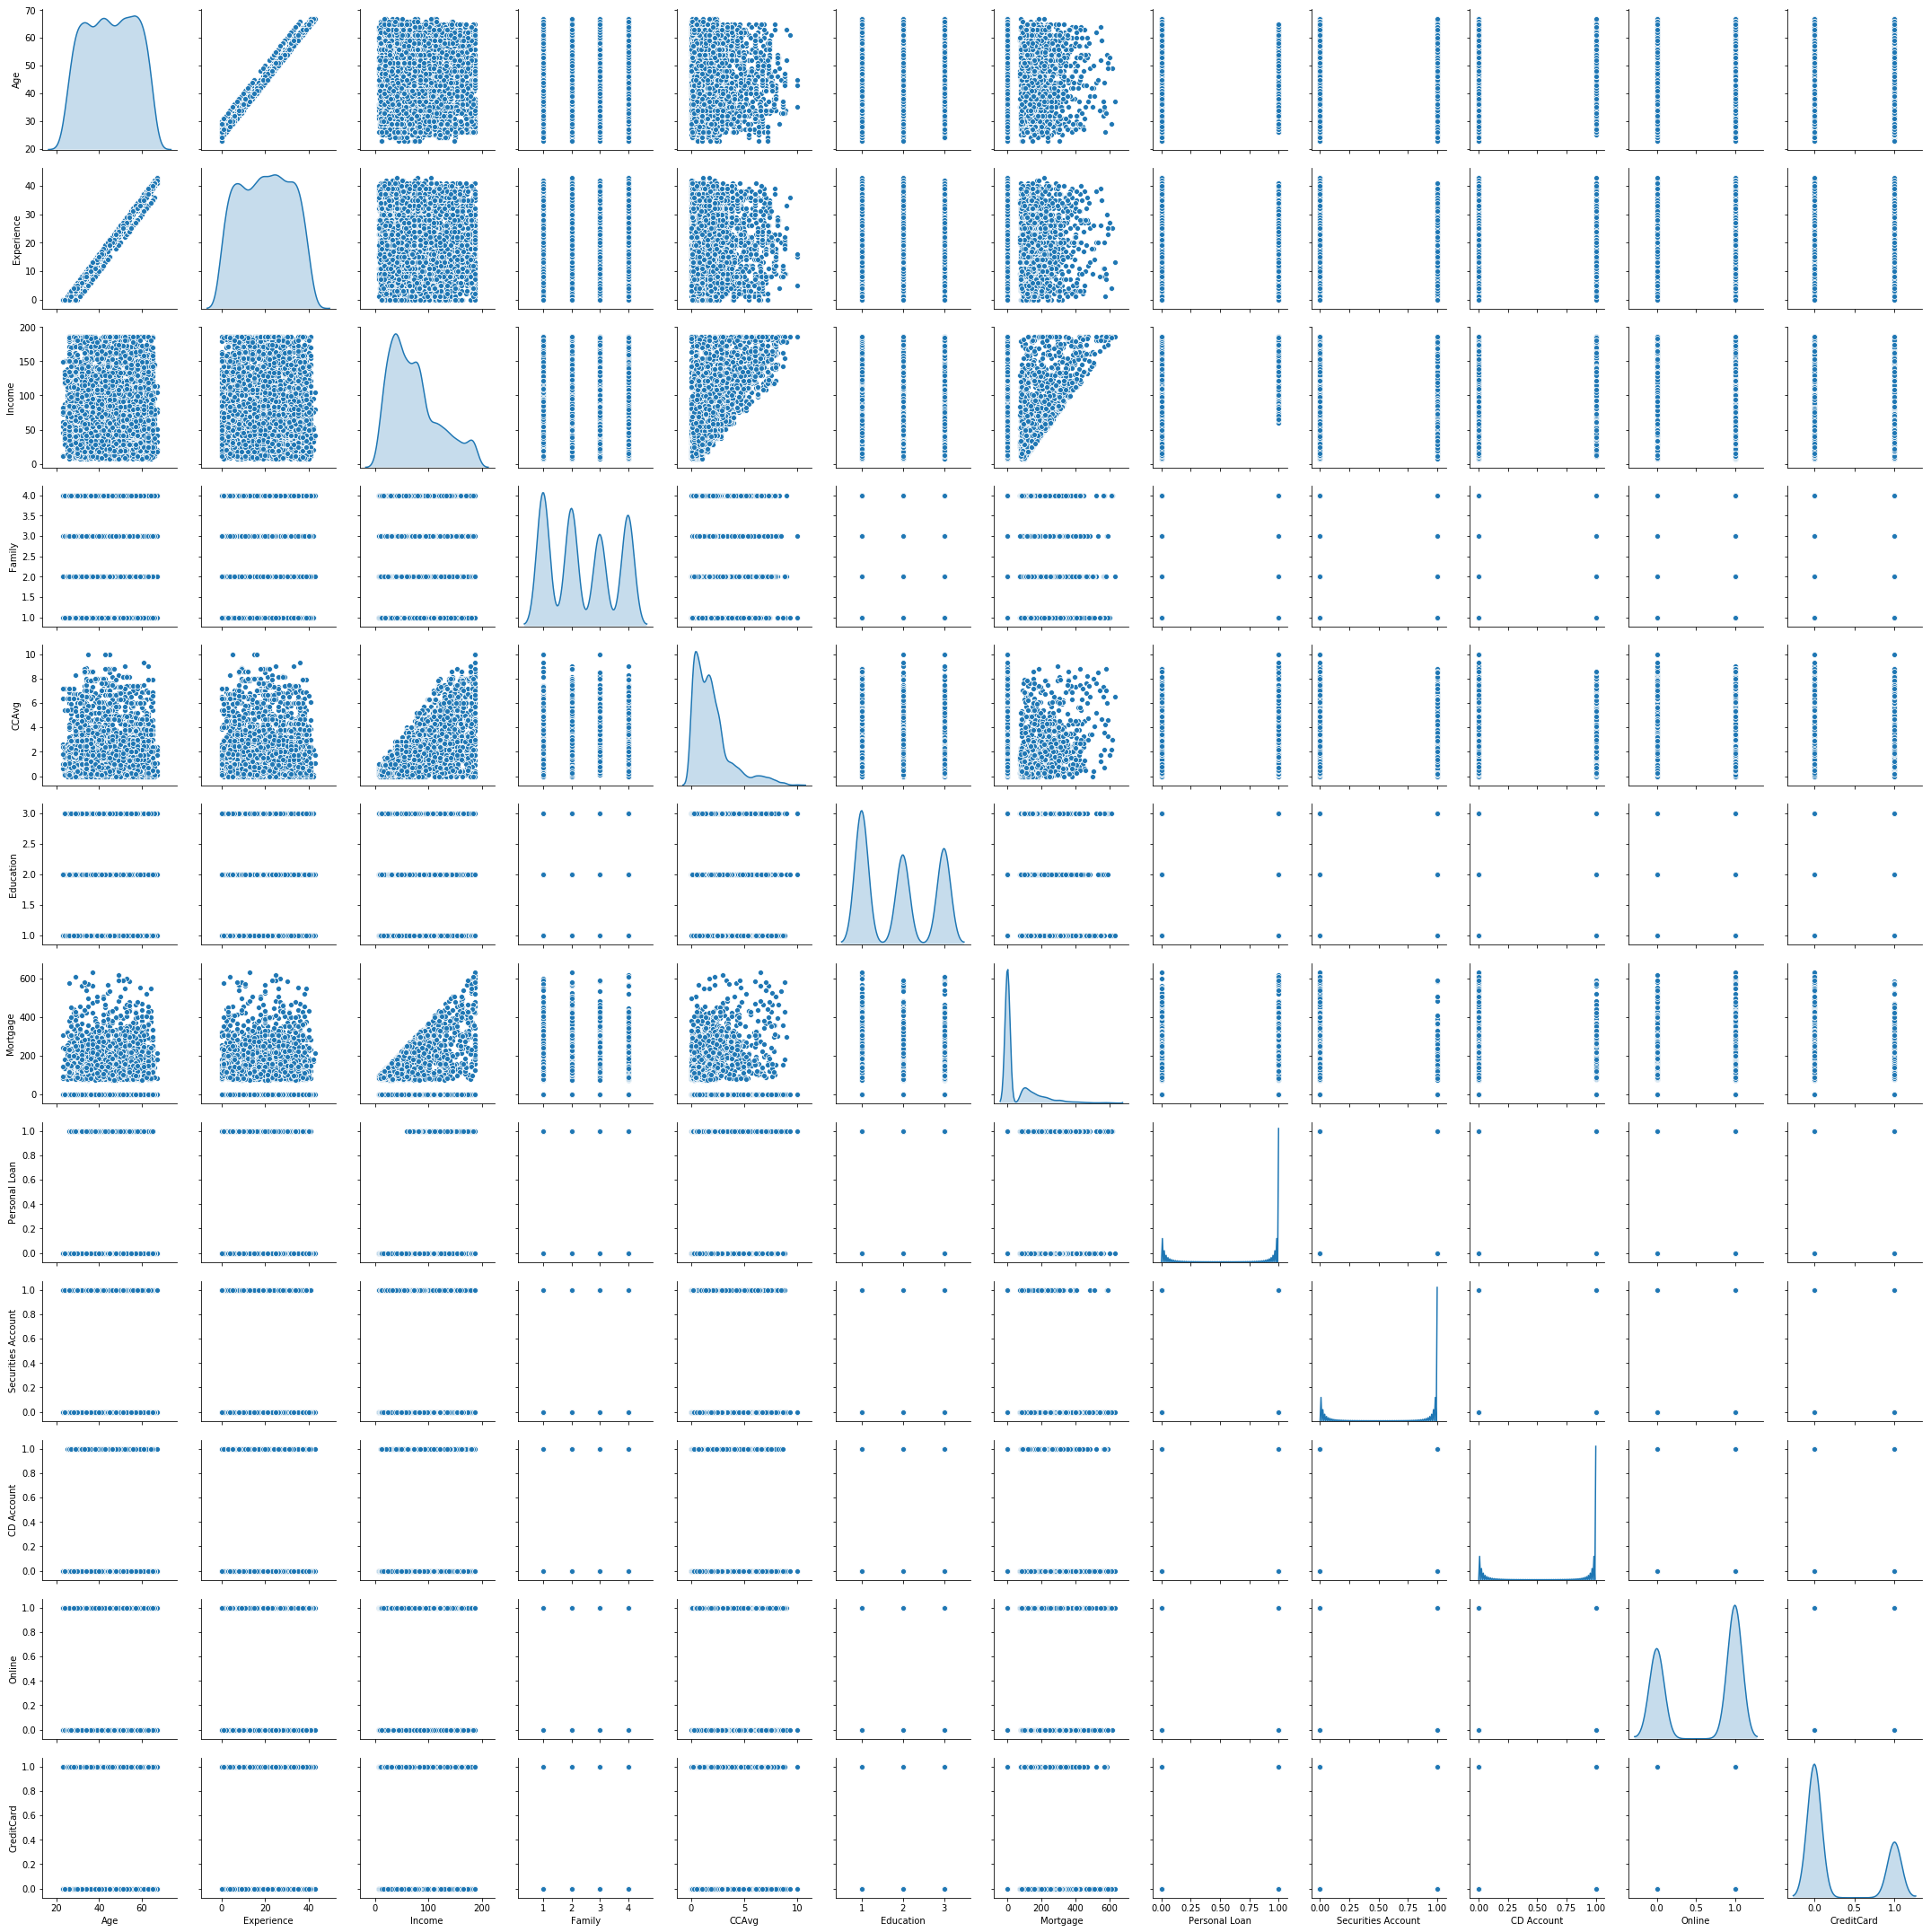

In [223]:
sns.pairplot(thera_df, diag_kind='kde')

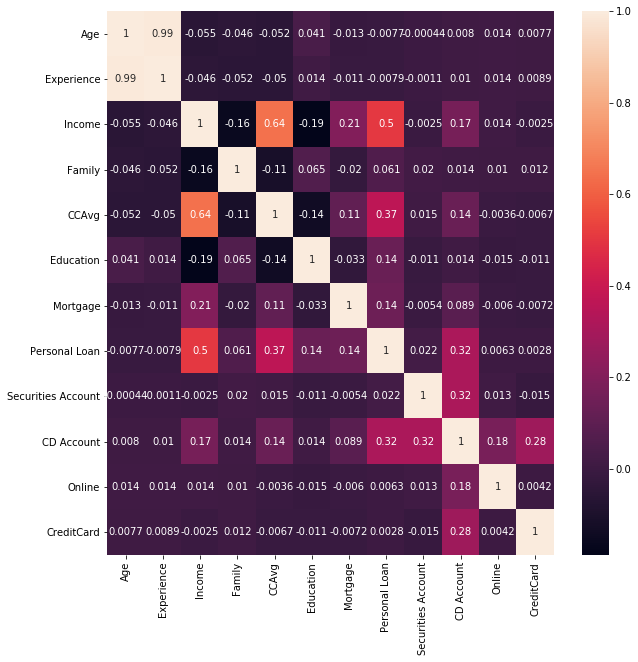

In [224]:
plt.figure(figsize=(10,10))
sns.heatmap(thera_df.corr(),annot = True)

'''Observations
1. Age and Experience shows strong correlation
2. Income and CCAvg shows strong correlation
3. Income and personal load shows strong correlation
4. CCAvg and Personal Loan show strong correlation'''

In [225]:
# Spliting the dataset into dependent and target variable
X = thera_df.drop(['Personal Loan'], axis=1)
y = thera_df['Personal Loan']

In [226]:
X.shape

(5000, 11)

In [227]:
y.shape

(5000,)

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=53) # Split into 70, 30 train test

In [229]:
print('size of training set ', X_train.shape)
print('size of testing set', X_test.shape)

size of training set  (3500, 11)
size of testing set (1500, 11)


In [230]:
# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


test_accuracy = model.score(X_test, y_test)
print('test accuracy ', test_accuracy)
train_accuracy = model.score(X_train, y_train)
print('train accuracy ',train_accuracy)
print('model accuracy ', metrics.accuracy_score(y_test, y_predict))
print('model f1 score ', metrics.f1_score(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

test accuracy  0.956
train accuracy  0.9494285714285714
model accuracy  0.956
model f1 score  0.7380952380952381
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1352
           1       0.89      0.63      0.74       148

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.93      0.81      0.86      1500
weighted avg       0.95      0.96      0.95      1500

[[1341   11]
 [  55   93]]


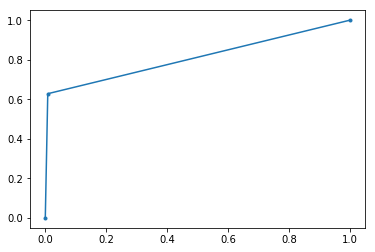

In [231]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [232]:
# Using Naive bayes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=30)

In [234]:
std_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [235]:
pred_test_std = std_clf.predict(X_test)

In [236]:
print('Test Accuracy ', metrics.accuracy_score(y_test,pred_test_std))
train_accuracy = model.score(X_train, y_train)
print('train accuracy ',train_accuracy)
print(metrics.classification_report(y_test, pred_test_std))
print(metrics.confusion_matrix(y_test, pred_test_std))

Test Accuracy  0.8986666666666666
train accuracy  0.9534285714285714
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1367
           1       0.41      0.32      0.36       133

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.67      0.64      0.65      1500
weighted avg       0.89      0.90      0.89      1500

[[1305   62]
 [  90   43]]


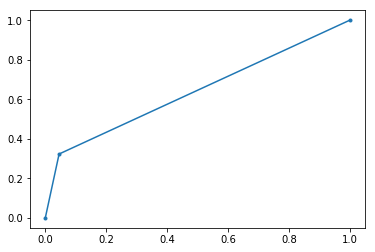

In [237]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_std)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [238]:
# using knn
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=25)

knn2 = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn2.fit(X_train,y_train)
y_pred_knn = knn2.predict(X_test)
knn_scaled = metrics.accuracy_score(y_test,y_pred_knn)
print('Test Accuracy ', metrics.accuracy_score(y_test,y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))
print(metrics.confusion_matrix(y_test, y_pred_knn))

Test Accuracy  0.9193333333333333
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1372
           1       0.56      0.24      0.34       128

   micro avg       0.92      0.92      0.92      1500
   macro avg       0.75      0.61      0.65      1500
weighted avg       0.90      0.92      0.90      1500

[[1348   24]
 [  97   31]]


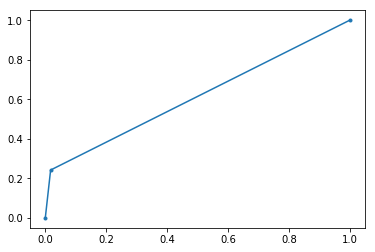

In [239]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Observations
1. Looking at the parameters like Precision, Recall and F1 scores of all 
three models the Logistic regrestion shows higher performance.

2. Looking at the confusion matrix for all the three models too suggest Logistic regression performs better
in predicting the TP and TN values.
Also the having a higher FP is acceptable for the bussiness compared to FN to loose potential business.

3. ROC for Logistic shows clearly Logistic performs more than other two models.